In [42]:
import cv2
import numpy as np
from PIL import Image
from scipy.signal import convolve

In [43]:
def as_pil(a: np.array) -> Image.Image:
    """Convert to PIL Image"""
    a = np.clip(a.astype(np.float32) * 255.0, 0.0, 255.0)
    return Image.fromarray(a.astype('uint8'), 'RGB')

def as_np(img: Image.Image) -> np.ndarray:
    """Convert to Numpy Array"""
    return np.array(img).astype(np.float32) / 255.0

# Original

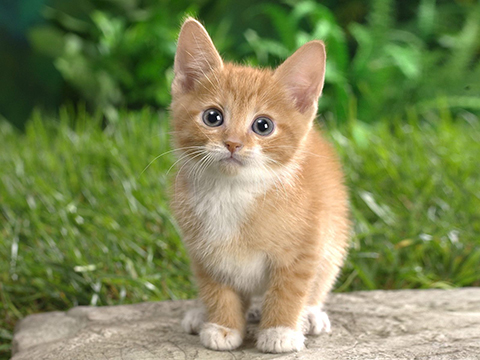

In [44]:
pil_image = Image.open("demo.jpeg")
original = as_np(pil_image)
pil_image

# Box Blur

In [45]:
K = 7
kernel_unormalized = np.ones((K,K,1)) # broadcast channels
kernel = kernel_unormalized / kernel_unormalized.sum()


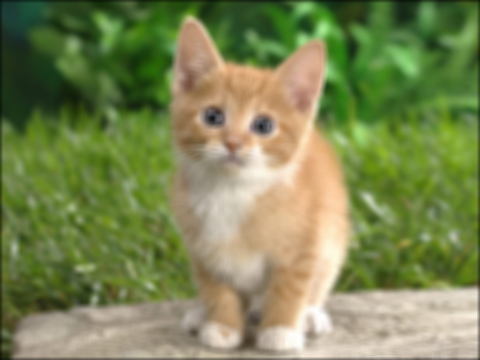

In [46]:
blurred = convolve(original, kernel, mode='same')
cv2.imwrite("blurred.jpeg", blurred)
as_pil(blurred)


# Sharpen

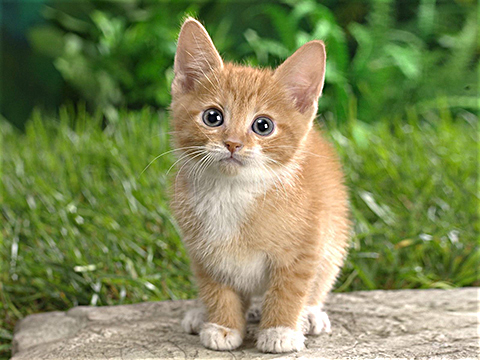

In [47]:
sharp = 1.5 * original - 0.5 * blurred
as_pil(sharp)